<Figure size 1500x600 with 0 Axes>

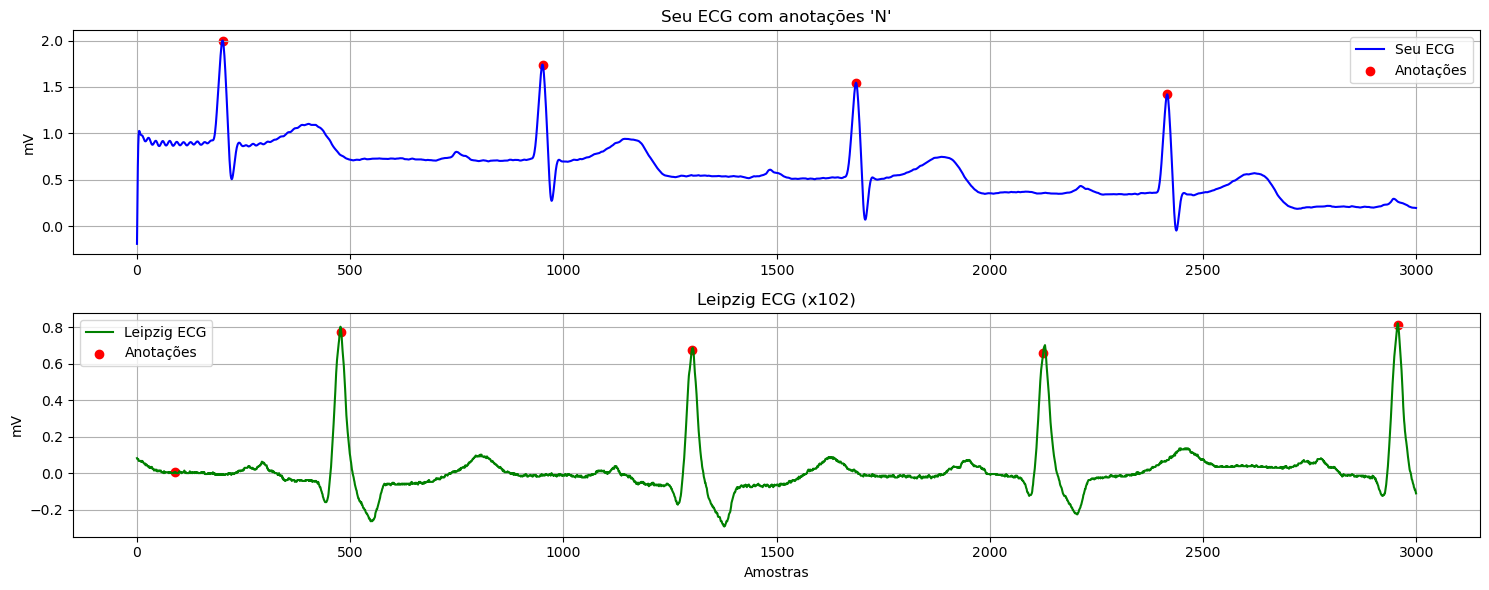

In [7]:
from scipy.signal import iirnotch, filtfilt, find_peaks
import serial
import time
import numpy as np
import wfdb
from datetime import datetime
from scipy.signal import butter, find_peaks, sosfiltfilt
import wfdb
import matplotlib.pyplot as plt

# Lê seu ECG processado com anotações
user_record = wfdb.rdrecord(r'C:\Users\Stella\Desktop\TCC\meu_ecg_filtrado')
user_ann = wfdb.rdann(r'C:\Users\Stella\Desktop\TCC\meu_ecg_filtrado', 'atr')

# Lê um registro Leipzig (exemplo: x007)
leipzig_record = wfdb.rdrecord(r'C:\Users\Stella\Desktop\TCC\db\x102')
leipzig_ann = wfdb.rdann(r'C:\Users\Stella\Desktop\TCC\db\x102', 'atr')

# Quantas amostras mostrar (ex: ~3 segundos)
samples_to_plot = 3000

plt.figure(figsize=(15, 6))

plt.figure(figsize=(15, 6))

# === ECG do Usuário ===
plt.subplot(2, 1, 1)
plt.plot(user_record.p_signal[:samples_to_plot, 0], label='Seu ECG', color='blue')

# Anotações do usuário
user_peaks = [s for s in user_ann.sample if s < samples_to_plot]
plt.scatter(
    user_peaks,
    user_record.p_signal[user_peaks, 0],
    color='red', label='Anotações'
)
plt.title("Seu ECG com anotações 'N'")
plt.ylabel("mV")
plt.legend()
plt.grid(True)

# === ECG do Banco Leipzig ===
plt.subplot(2, 1, 2)
plt.plot(leipzig_record.p_signal[:samples_to_plot, 0], label='Leipzig ECG', color='green')

leipzig_peaks = [s for s in leipzig_ann.sample if s < samples_to_plot]
plt.scatter(
    leipzig_peaks,
    leipzig_record.p_signal[leipzig_peaks, 0],
    color='red', label='Anotações'
)
plt.title("Leipzig ECG (x102)")
plt.xlabel("Amostras")
plt.ylabel("mV")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
